In [4]:
import pandas as pd
from pandas import read_excel

file_name = 'target_data.xlsx' 
target_data = read_excel(file_name)
target_data = target_data.fillna(0)

In [7]:
feature_cols = list(target_data.columns[1:-6])

X_all = target_data[feature_cols]

In [18]:
from sklearn.ensemble import RandomForestClassifier
import pickle

mfmodel = pickle.load(open('mfmodel.pkl', 'rb'))

prediction = mfmodel.predict(X_all)
sales_cols = list(target_data.columns[:-6])
result = target_data[sales_cols]
result["mf_sales_prediction"] = prediction
result = result[result.mf_sales_prediction == 1]
print(result.shape[0])
print(result[:1000])
result.to_excel("mf_sales_prediction.xlsx", index=False)

/home/syanakieva/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


207
      Client  Sex  Age  Tenure  Count_CA  Count_SA  Count_MF  Count_OVD  \
0          1  1.0   51       7         1       0.0       0.0        1.0   
26        27  0.0   62     181         1       0.0       0.0        1.0   
33        34  1.0   48     104         1       1.0       3.0        1.0   
35        36  1.0   49     263         1       1.0       2.0        0.0   
41        42  0.0   23       4         1       0.0      12.0        0.0   
...      ...  ...  ...     ...       ...       ...       ...        ...   
1563    1564  1.0   29     175         1       0.0       0.0        1.0   
1568    1569  1.0    3     152         1       3.0      32.0        0.0   
1570    1571  0.0   39     211         1       0.0       0.0        0.0   
1584    1585  1.0   28     221         1       0.0       0.0        0.0   
1612    1613  0.0   46      45         1       0.0       0.0        0.0   

      Count_CC  Count_CL  ...  VolumeDeb_CA  VolumeDebCash_Card  \
0          0.0       0.0  ..

Text(0.5, 0, 'Random Forest Feature Importance')

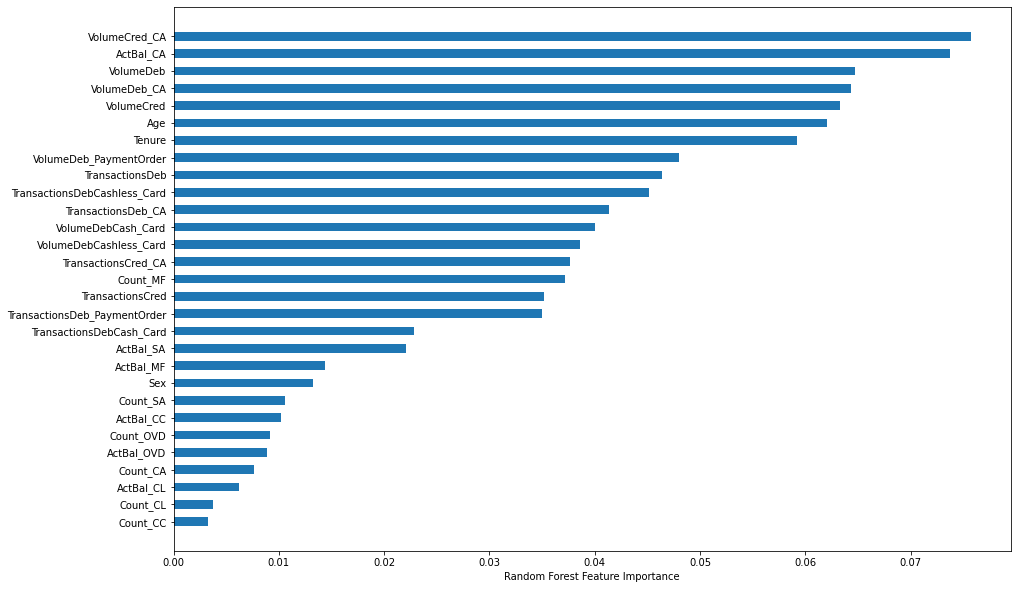

In [10]:
from matplotlib import pyplot
importance = mfmodel.feature_importances_
import numpy as np

sorted_idx = mfmodel.feature_importances_.argsort()
pyplot.figure(figsize=((15), (10)))
pyplot.barh(np.array(feature_cols)[sorted_idx], mfmodel.feature_importances_[sorted_idx], height=0.5)
pyplot.xlabel("Random Forest Feature Importance")

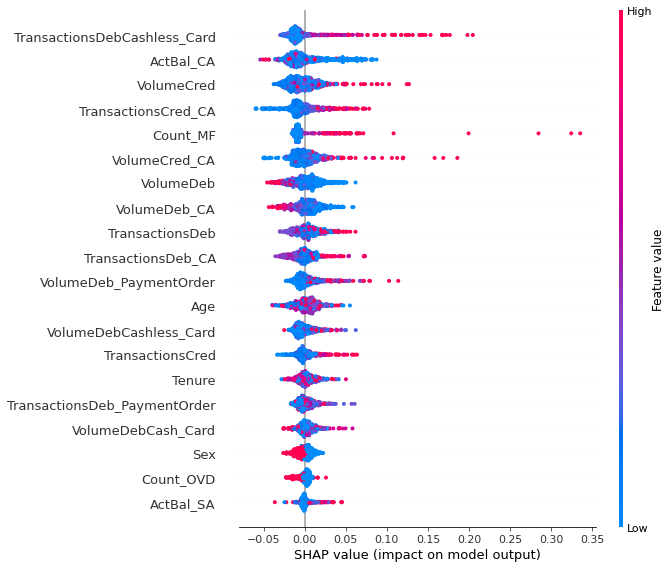

In [6]:
import shap
explainer = shap.TreeExplainer(mfmodel)
shap_values = explainer.shap_values(X_all)

shap.summary_plot(shap_values[1], X_all)